<a href="https://colab.research.google.com/github/alphamale126/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**
In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **Data Description -**
**Battery_power** - Total energy a battery can store in one time measured in mAh

**Blue** - Has bluetooth or not

**Clock_speed** - speed at which microprocessor executes instructions

**Dual_sim** - Has dual sim support or not

**Fc** - Front Camera mega pixels

**Four_g** - Has 4G or not

**Int_memory** - Internal Memory in Gigabytes

**M_dep** - Mobile Depth in cm

**Mobile_wt** - Weight of mobile phone

**N_cores** - Number of cores of processor

**Pc** - Primary Camera mega pixels

**Px_height** - Pixel Resolution Height

**Px_width** - Pixel Resolution Width

**Ram** -Random Access Memory in Mega Bytes

**Sc_h** - Screen Height of mobile in cm

**Sc_w** - Screen Width of mobile in cm

**Talk_time** - longest time that a single battery charge will last when you are

**Three_g** - Has 3G or not

**Touch_screen** - Has touch screen or not

**Wifi** - Has wifi or not

**Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

# **Importing the Modules and Loading the Dataset**

In [2]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading the data file
mobile_data = pd.read_csv('/content/drive/MyDrive/Mobilepriceprediction/data_mobile_price_range.csv')

# **Exploring the data in the given dataset**

In [5]:
#Data in the top 5 rows 
mobile_data.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
#Data in the bottom 5 rows
mobile_data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [7]:
# Printing the shape of the dataset
print(mobile_data.shape)

(2000, 21)


In [8]:
# Checking for Null values
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
# Checking the data
mobile_data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


We can see that sc_width and px_height has minimum value 0, which is not possible in any mobile. So we need to handle this mismatch.

In [10]:
# Checking How many observations having screen width value as 0.
print(mobile_data[mobile_data['sc_w']==0].shape[0])

180


In [11]:
# Checking How many observations having px_hieght value as 0.
print(mobile_data[mobile_data['px_height']==0].shape[0])

2


In [12]:
# As there are only 2 observations having px_height=0. so we will drop it.
mobile_data=mobile_data[mobile_data['px_height']!=0]

Missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors.

Before using KNN Imputer, for it to work, we need to replace 0 with NAN values.

In [13]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
mobile_data['sc_w']=mobile_data['sc_w'].replace(0,np.nan)

In [14]:
# importing KNN imputer from sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
mobile_data=pd.DataFrame(impute_knn.fit_transform(mobile_data),columns=mobile_data.columns)

In [15]:
# Checking the shape of dataset 
mobile_data.shape

(1998, 21)

In [16]:
# Checking How many observations having sc_w value as 0.
mobile_data[mobile_data['sc_w']==0].shape[0]

0

Thus we have handled the mismatched values of the data.

In [22]:
# Checking the datatypes, non null values
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   float64
 4   fc             1998 non-null   float64
 5   four_g         1998 non-null   float64
 6   int_memory     1998 non-null   float64
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        1998 non-null   float64
 10  pc             1998 non-null   float64
 11  px_height      1998 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1998 non-null   float64
 15  sc_w           1998 non-null   float64
 16  talk_time      1998 non-null   float64
 17  three_g        1998 non-null   float64
 18  touch_sc

We don't have any object data type in our data set.

Also we have Zero null values in data set.

Price_range is our target variable.

In [17]:
mobile_data.nunique()

battery_power    1093
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1136
px_width         1109
ram              1561
sc_h               15
sc_w               18
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [18]:
# Checking for Null values.
mobile_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0.5, 1.0, ' Visualizing Missing Values')

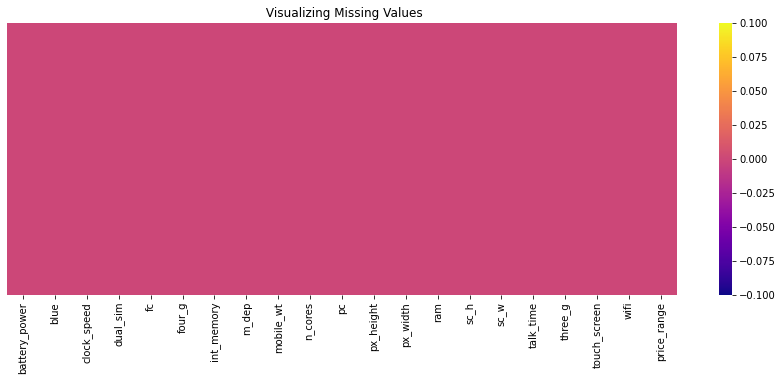

In [19]:
# Visualizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(mobile_data.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualizing Missing Values")

From the above we can say there are No Null values present in the dataset

In [20]:
# Checking for an duplicated values
mobile_data.duplicated().sum()

0

In [22]:
# Checking the Target Variable
price_range_values=mobile_data['price_range'].value_counts()
price_range_values

2.0    500
0.0    500
1.0    499
3.0    499
Name: price_range, dtype: int64

We can see from the above that we have almost equal number of obseravtions for each category. Thus we don't have imbalanced target variable.

Accuracy score will be the best evalaution metric for us to select the model.

This is the target variable with value of

**0**=low cost,

**1**=medium cost,

**2**=high cost,

**3**=very high cost.



# **Exploratory Data Analysis Of The Data Set**

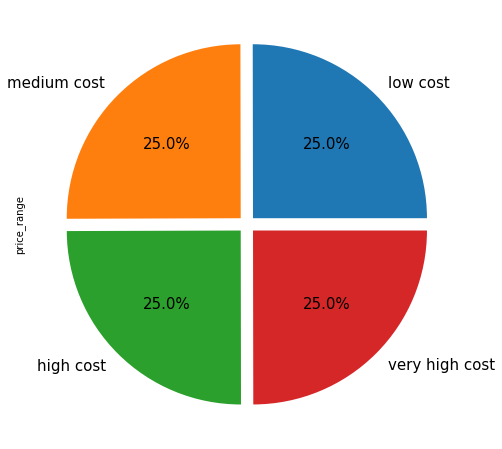

In [23]:
# Visualizing the Target variable's class distribution with a pie chart.
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15)

We can see that our target varibale is equally distributed.

Thus we don't have to worry about data imbalance and there is no need of oversampling or undersampling.

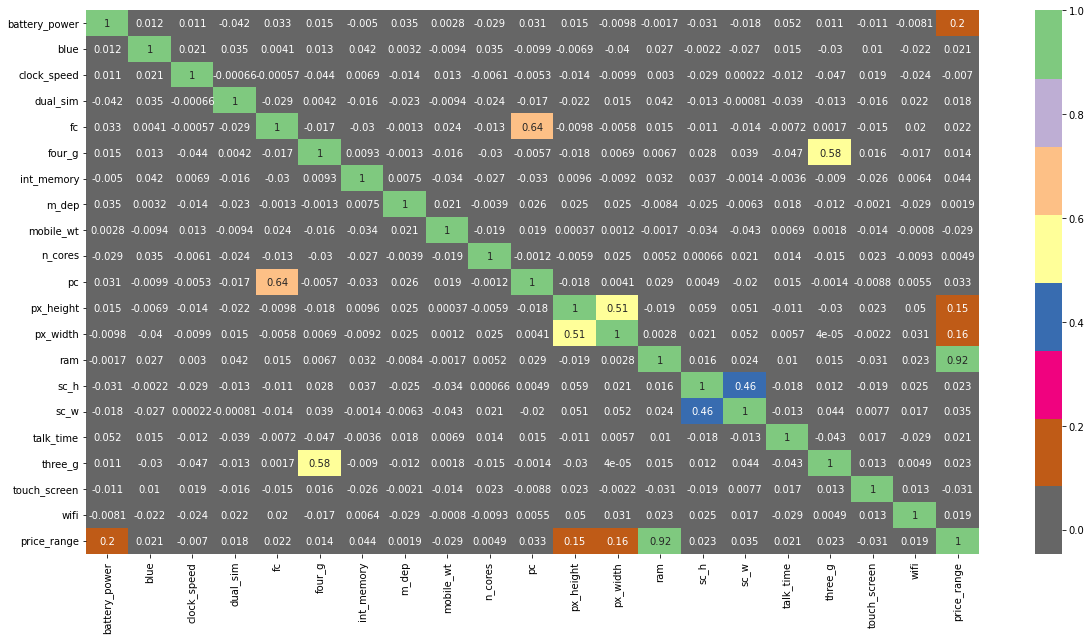

In [24]:
# Checking the correlation between Dependent and independent attributes
corr= mobile_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

From the above Heatmap we can say that

**RAM** is positively correlated with the **Price_range**, we know that Mobiles with high RAM are very costly.
Thus as **RAM** increases **price_range** increases too.

**Battery_power** is positively correlated with the **price_range**.

Generally mobiles having high prices comes with good battery power.


**px_height** and **px_width** (Pixel Resolution Height and width) are positively correlated.

Generally High price range mobiles have good resolutions.

**Four_g** and **Three_g** are highly positvely correlated.

Nowdays most of the smart mobiles has both type of options. This could be the reason that they are correlated.

**pc** and **fc** are positively correlated.

**sc_h** and **sc_w** are positively correlated.

## **Analysis of Categorical columns**

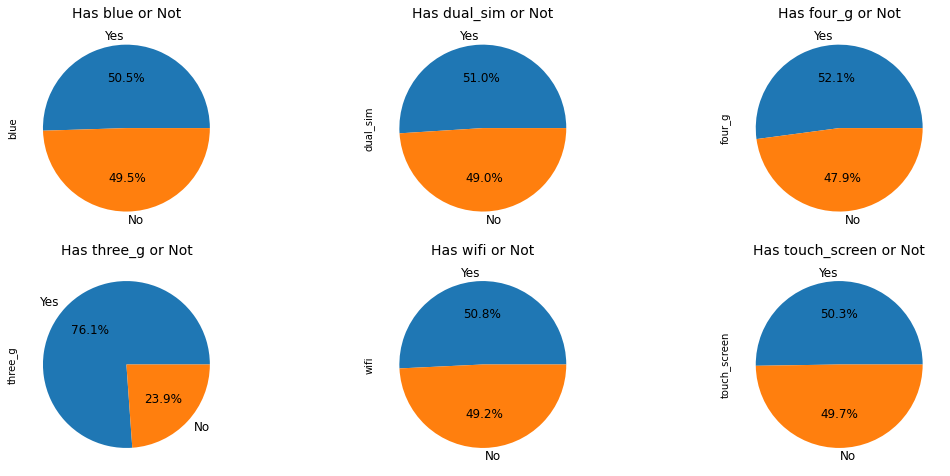

In [26]:
# Plotting the piecharts for binary categorical variables.
plt.figure(figsize=(15,10))
rows=3
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  mobile_data[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels)
  plt.title(f'Has {var} or Not',fontsize=14)
  plt.tight_layout()
  count=count+1

From the above we can say that

Percentage Distribution of Mobiles having **bluetooth**, **dual_sim**, **4G**, **wifi** and **touchscreen** are almost 50 %.

We also observed that very few mobiles(**23.9%**) do not have Three_g.

## **Analysis of independent variables with respect to Dependent variable**

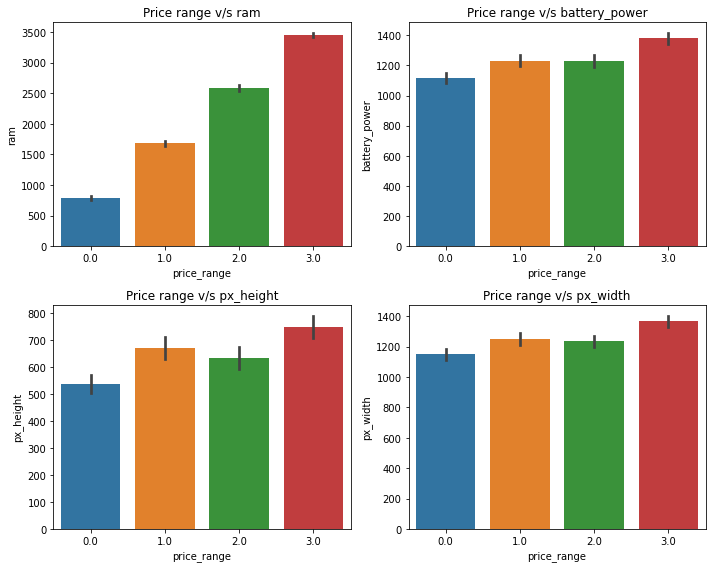

In [29]:
# Plotting  price_range vs other features
plt.figure(figsize=(10,8))
labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']
rows=2   
cols=2
counter=1

variables=['ram','battery_power','px_height','px_width']
for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=mobile_data['price_range'],y=mobile_data[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()

From the above plots we can say that, 

Mobiles having **RAM** more than **3000MB** has very high cost.

As **RAM** increases **price_range** also increases.

Mobiles having RAM less than **1000MB** will be of low cost.

Mobiles with battery power more than **1300mAh** has very high cost.

Mobiles with battery power between **1200** and **1300mAH** ranges under medium and high cost.

Mobiles with **pixel_height** more than **700** and **width** more than **1300** has very high cost.

In [31]:
# Checking the counts of binary categorical variables by grouping price range.
grup_by_price=mobile_data.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()
grup_by_price

blue      dual_sim      four_g      three_g      touch_screen  \
             0.0  1.0      0.0  1.0    0.0  1.0     0.0  1.0          0.0   
price_range                                                                 
0.0          257  243      250  250    241  259     127  373          238   
1.0          255  244      244  255    238  261     122  377          239   
2.0          257  243      251  249    253  247     113  387          265   
3.0          240  259      234  265    225  274     115  384          252   

                 wifi       
             1.0  0.0  1.0  
price_range                 
0.0          262  252  248  
1.0          260  247  252  
2.0          235  248  252  
3.0          247  237  262

Text(0, 0.5, 'Count of phones')

<Figure size 1008x504 with 0 Axes>

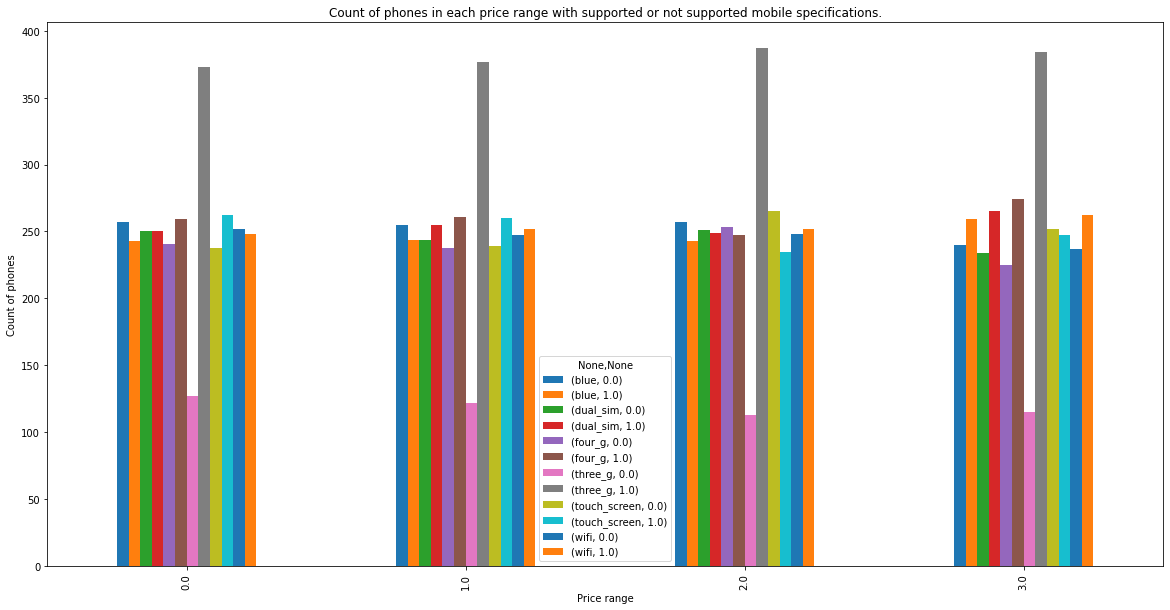

In [37]:
# Visualizing by plotting barchat.
plt.figure(figsize=(14,7))
grup_by_price.plot.bar(figsize=(20,10))
plt.title('Count of phones in each price range with supported or not supported mobile specifications.')
plt.xlabel('Price range')
plt.ylabel('Count of phones')

We can see that each price_range category has almost equal number of mobiles phones having both supporting and non supporting specification

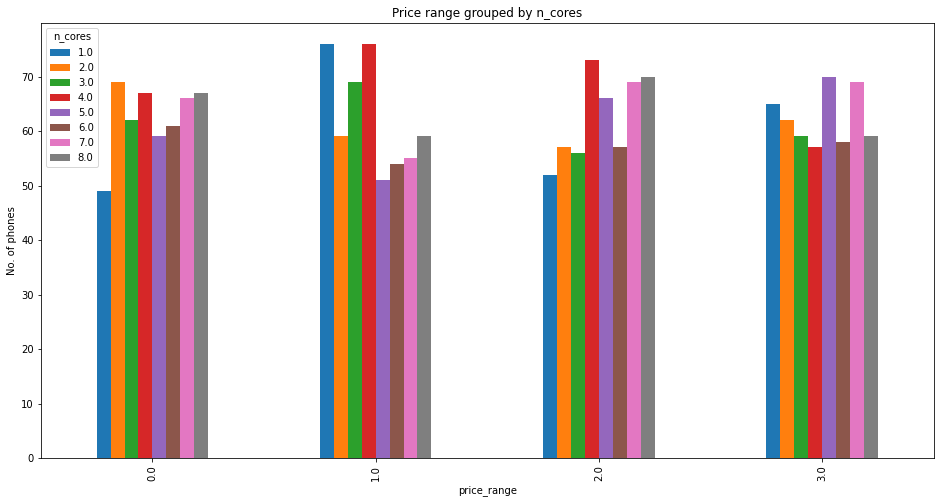

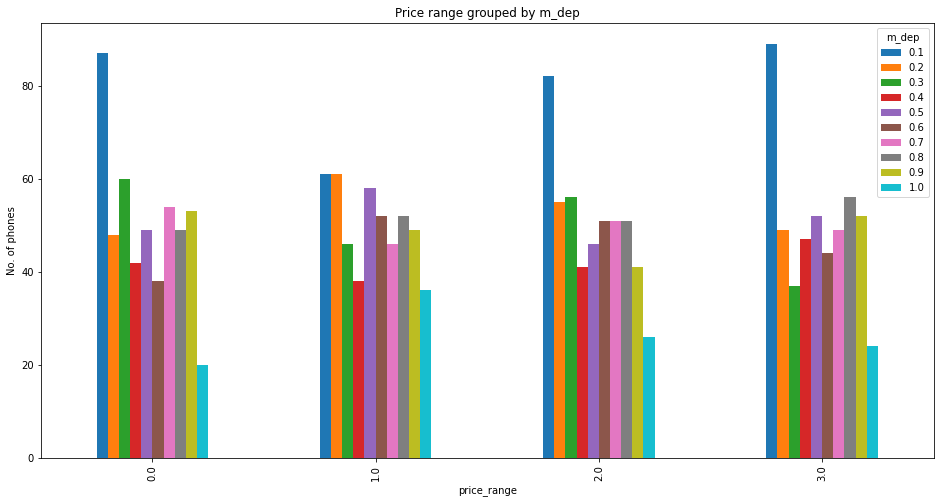

In [40]:
# Analyzing 'Price_range' with respect to 'n_cores' and 'm_dep'

list_2=['n_cores','m_dep']
for item in list_2:
  
  mobile_data.groupby(['price_range'])[item].value_counts().unstack().plot.bar(figsize=(16,8))
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')

There are very few mobiles in price range 0 and 1 with lesser no of cores.

Most of the mobiles in price range 2 and 3 are with high no of cores.

Number of phones with less thickness are high and count of phones with high thickness is low.

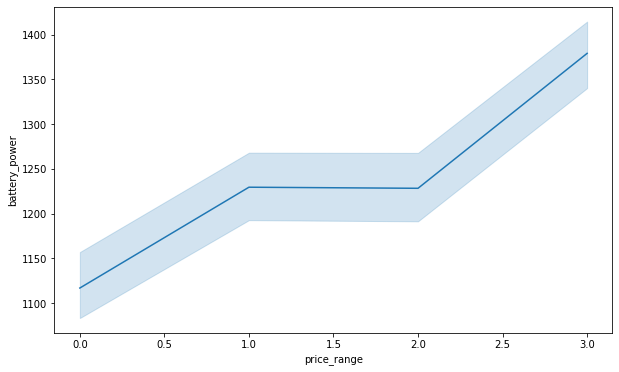

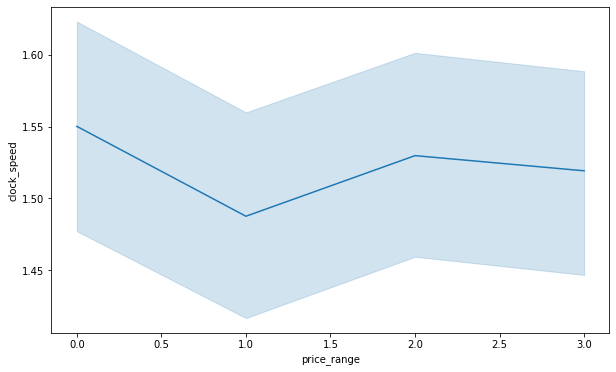

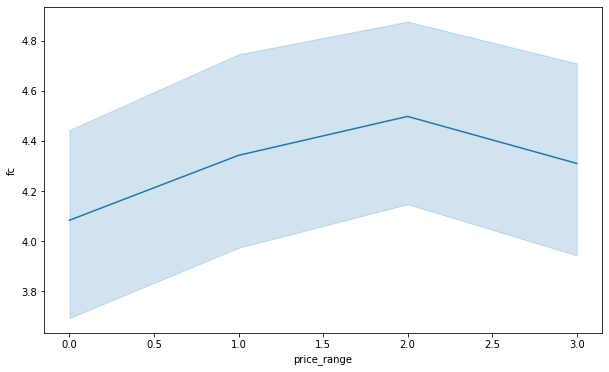

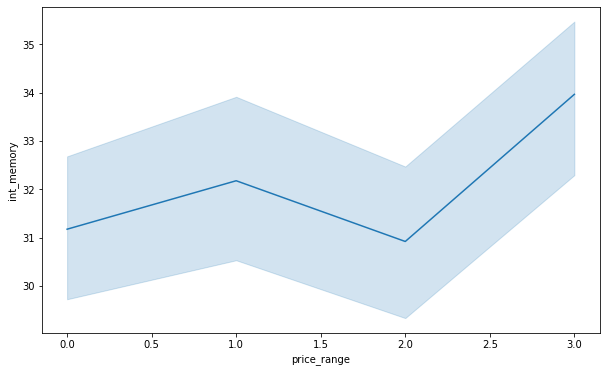

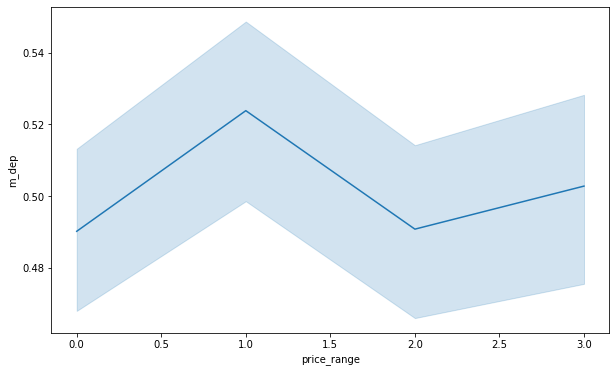

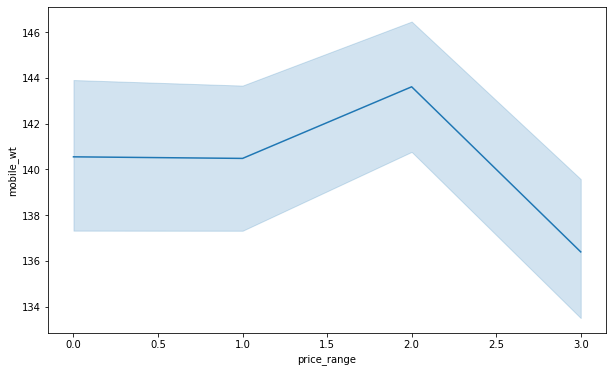

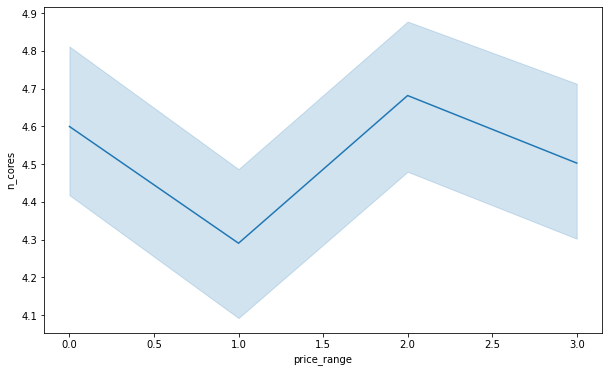

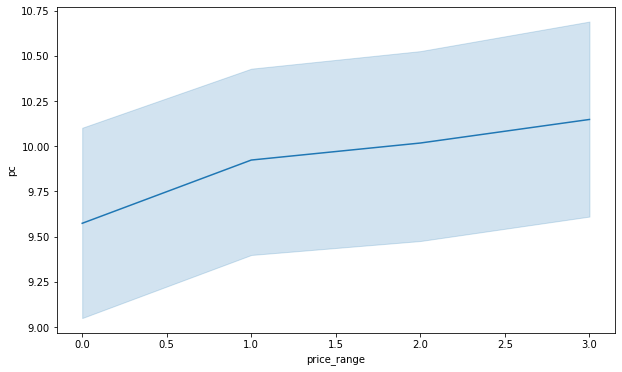

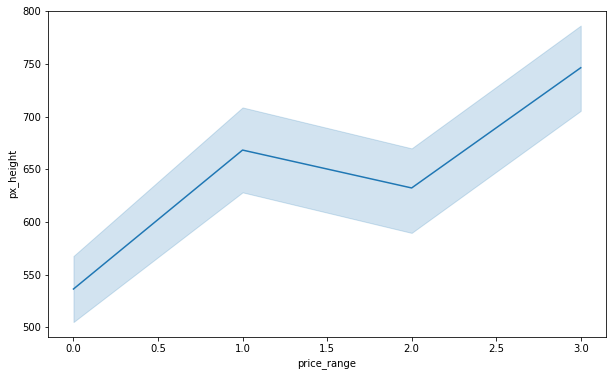

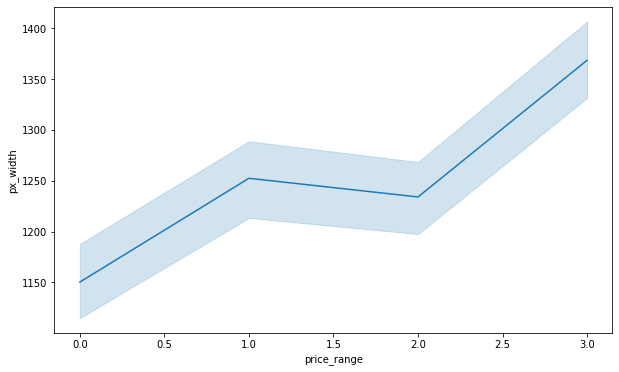

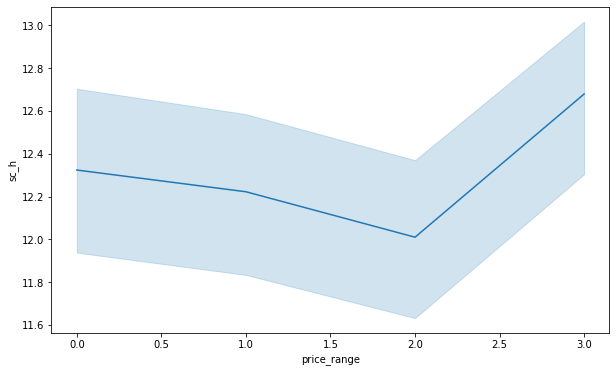

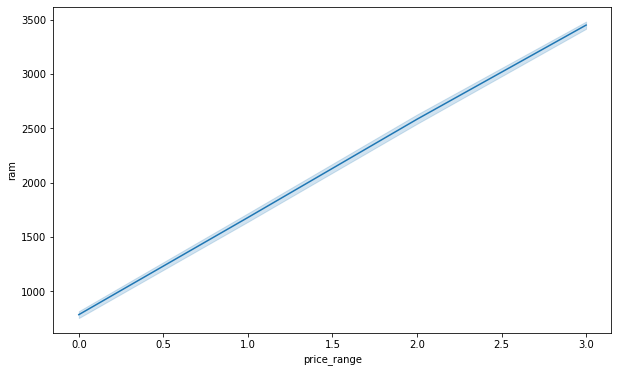

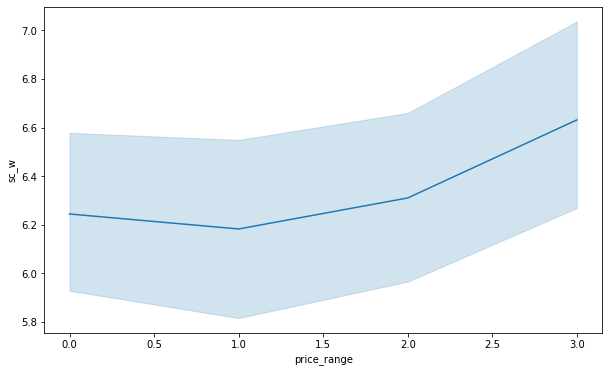

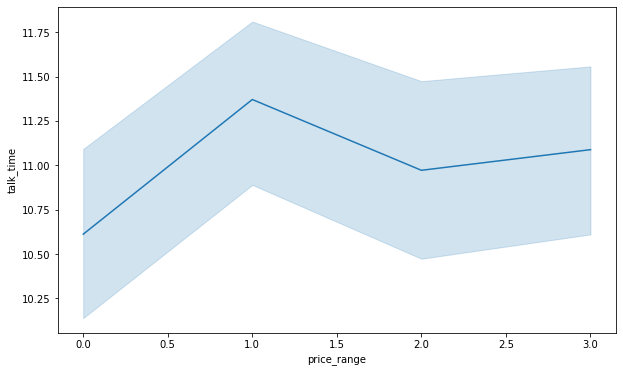

In [41]:
# Plotting Boxplot and checking the distribution of dependent variables with respect to price_range
list_1=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','sc_h','ram','sc_w','talk_time']
counter=1
for var in list_1:
    plt.figure(figsize=(10,6))
    
    sns.lineplot(x=mobile_data['price_range'],y=mobile_data[var])

For class 1 and class 2 battery power range is almost similar.

As battery power increases, price also increases which is quite obvious.

Mobiles in very high price range(Class 3) has less weight compared to other classes, that means as weight of mobiles decrease price increases.

Mobiles having max screen height and width falls in very high price category.

From the linechart of sc_width and sc_height we observed that, from class 2, Screen width and height starts increasing with price.

Similarly with px_height and px_width, as resolution of screen increases the price also increases.

We also saw that RAM has clear and linear relationship with price range, we saw that in correlation matrix too.

In [44]:
# Analyzing the Mobiles having both 3G and 4G specifications.
three_g_and_4g_df=mobile_data[(mobile_data['three_g']==1) & (mobile_data['four_g']==1)]

In [45]:
three_g_and_4g_df['price_range'].value_counts()

3.0    274
1.0    261
0.0    259
2.0    247
Name: price_range, dtype: int64

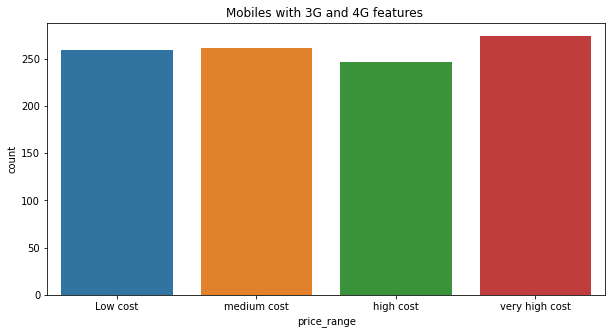

In [46]:
# Visual representation of price range vs 3G & 4G features
plt.figure(figsize=(10,5))
sns.countplot(three_g_and_4g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with 3G and 4G features ")
plt.show()

From the above plot, we can say that mobiles from low cost to very high cost, have both 3G and 4G features almost similarly.

In [47]:
# Analyzing the Mobiles having only 3G specifications.
three_g_df=mobile_data[(mobile_data['three_g']==1) & (mobile_data['four_g']!=1)]

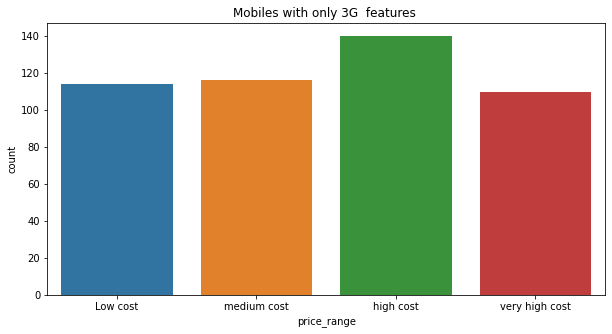

In [48]:
# Visual representation of price range vs 3G feature
plt.figure(figsize=(10,5))
sns.countplot(three_g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with only 3G  features ")
plt.show()

From the above plot we observed that Mobiles with very high cost are very less likely to have 3G.

There are more chances that high cost mobile will have 3G in it.

In [49]:
# Analyzing the Mobiles that does not have both 3G and 4G specifications.
No_3g_4G_df=mobile_data[(mobile_data['three_g']!=1) & (mobile_data['four_g']!=1)]

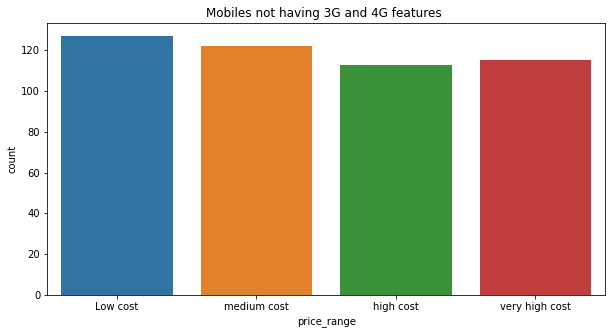

In [51]:
# Visual representation of price range vs mobiles without 4G & 3G features
plt.figure(figsize=(10,5))
sns.countplot(No_3g_4G_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles not having 3G and 4G features ")
plt.show()

Its very obvious that low cost mobiles will not have 3G and 4G.

Mobiles with very high cost may have advanced network systems like 4G & 5G, as we know technologies are advancing time to time.

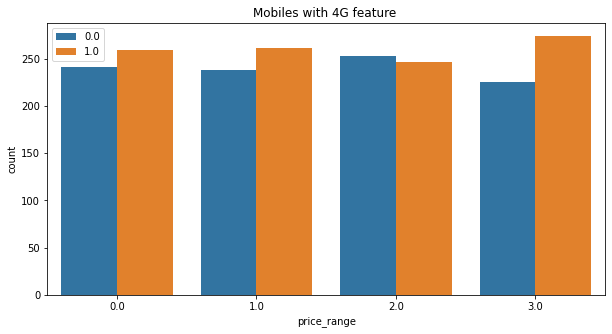

In [53]:
# Analyzing the Mobiles having only 4G specification.
plt.figure(figsize=(10, 5))
sns.countplot(mobile_data['price_range'],hue=mobile_data['four_g'])
plt.title("Mobiles with 4G feature ")
plt.legend(loc='best')

From the above plot we can say that mobiles with very high cost are more likely to have 4G feature than with other price ranges

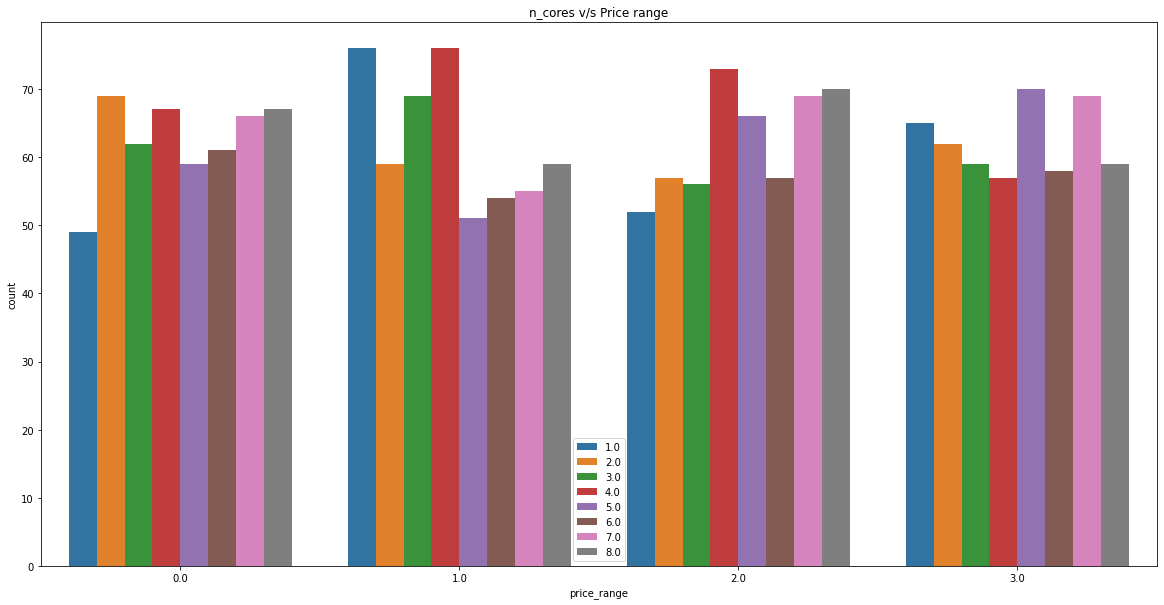

In [55]:
# Analyzing the n_cores with respect to price range
plt.figure(figsize=(20,10))
sns.countplot(mobile_data['price_range'],hue=mobile_data['n_cores'])
plt.title("n_cores v/s Price range")
plt.legend(loc='best')

From the above plot we observed that

For Price range 0 majority of phones have 2 core processors

For Price range 1 majority of phones have 1 and 4 core processors

For Price range 2 majority of phones have 4 core processors

For Price range 3 majority of phones have 5 and 7 core processors


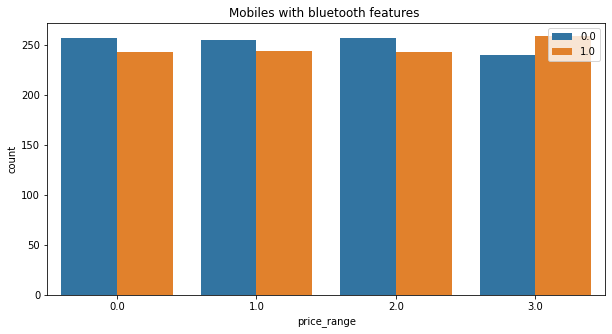

In [56]:
#Analyzing the mobiles with bluetooth feature with respect to price range
plt.figure(figsize=(10, 5))
sns.countplot(mobile_data['price_range'],hue=mobile_data['blue'])
plt.title("Mobiles with bluetooth features ")
plt.legend(loc='best')

Majority of phones with price range from 0 to 2 dont have bluetooth.

On the other hand phones with price range of 3 are more likely to have bluetooth service.